In [1]:
import os,sys

import joblib
import numpy as np
import xarray as xr
import datetime

import glob

import matplotlib.pyplot as plt

In [2]:
def read_data(filename, max_holograms = 1e10):
    with open(filename, "rb") as fid:
        loaded = 0 
        while True:
            try:
                yield joblib.load(fid)
                loaded += 1
            except:
                break
            # Option to load a subset of the data
            if loaded == max_holograms:
                break

In [3]:
data_path = '/glade/work/schreck/repos/holodec-ml/scripts/schreck/matt_data/*.pkl'
# data_path = '/glade/p/cisl/aiml/ai4css_hackathon/holodec/'

In [4]:
file_list = glob.glob(data_path)
for f_idx,file in enumerate(file_list):
    print(f'{f_idx}.) '+file.split('/')[-1])

0.) validation_1_25particles_gamma.pkl
1.) validation_1_25particles_gamma_smaller.pkl
2.) training_1_25particles_gamma.pkl
3.) training_1_25particles_gamma_smaller.pkl


In [5]:
f_sel = 3
dataFile = file_list[f_sel]

In [21]:
training_data = read_data(dataFile,max_holograms=5)

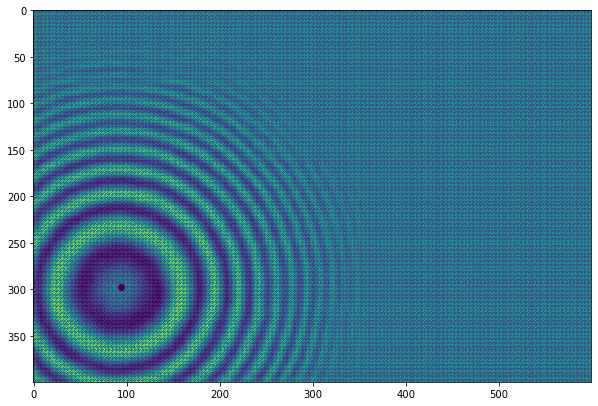

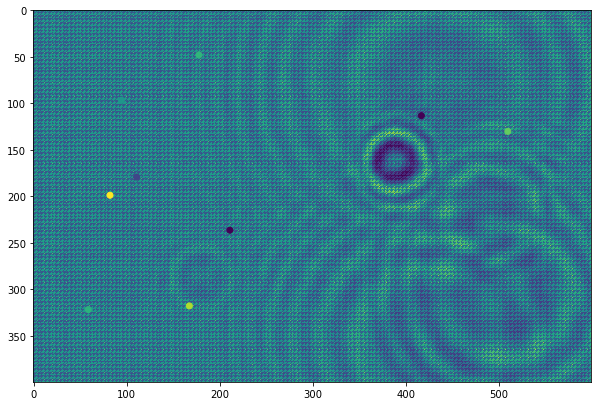

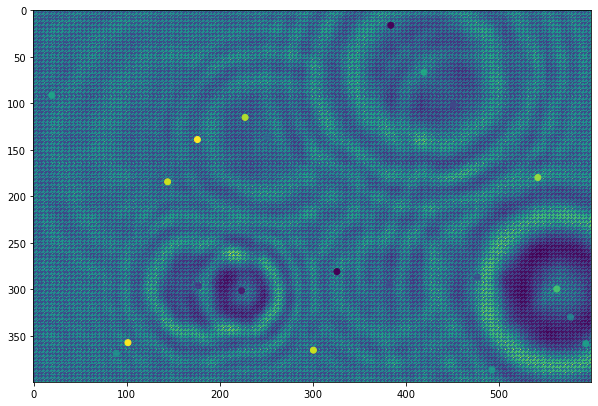

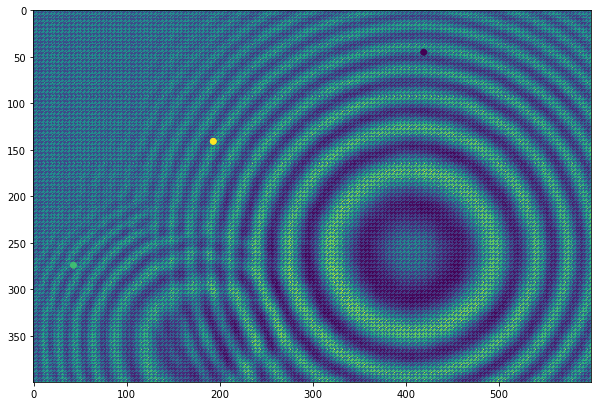

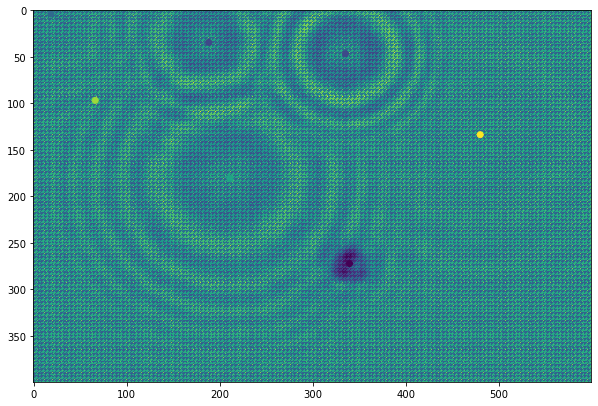

In [22]:
for idx,one_hologram in enumerate(training_data):
    # filename, hid, raft, z, mu, logvar, y_out
    filename, hid, image_pred, raft, z_latent, mu, logvar, y_out = one_hologram
    
    plt.figure(figsize=(10,10))
#     plt.imshow(image_pred[0,:,::-1].T)
    plt.imshow(((1+image_pred[1,:,::-1])**2+2*(1+image_pred[1,:,::-1])*image_pred[0,:,::-1]+image_pred[0,:,::-1]**2).T)
    plt.scatter((y_out['x']/3+image_pred.shape[1]/2),(y_out['y']/3+image_pred.shape[2]/2),c=y_out['z'])
#     print(y_out)

In [28]:
y_out

{'x': array([-701.76239014,  540.04858398, -844.6673584 , -335.59469604,
        -267.42333984,  105.41449738,  118.5507431 ]),
 'y': array([-309.41021729, -198.6126709 , -588.97216797, -496.12167358,
         -58.01158524, -459.9302063 ,  217.15086365]),
 'z': array([128324.65625  , 147822.921875 ,  60002.984375 ,  43965.9296875,
         92648.6796875,  44236.1953125,  14983.71875  ]),
 'd': array([ 27.01164055,  30.32577896,  37.83035278,  43.40855789,
         48.6625061 ,  50.70665741, 112.3507309 ])}

In [32]:
image_pred.shape

(2, 600, 400)